# Lab:  Model selection for basketball data

In this lab, you will apply polynomial regression with model order selection to a basketball dataset. 

Before doing this lab, you should review the polynomial model selection demo.  In addition to the concepts in that demo, you will learn to:
* Fit a polynomial model for a given model order 
* Select the model order via K-fold cross-validation and the one-standard-error rule.
  

## Loading the data

We first load the standard packages.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

We now load the basketball dataset, which we can get from `openml`.

In [2]:
from sklearn.datasets import fetch_openml
basketball = fetch_openml(name="baskball", version=1)

Let's turn this dataset into a `pandas` dataframe for ease of handling, and examine the features.

In [3]:
import pandas as pd
df = pd.DataFrame(basketball.data)
df.head()

,assists_per_minute,height,time_played,age
0,0.0888,201.0,36.02,28.0
1,0.1399,198.0,39.32,30.0
2,0.0747,198.0,38.80,26.0
3,0.0983,191.0,40.71,30.0
4,0.1276,196.0,38.40,28.0


In this lab, we will ignore `basketball.target` and instead investigate the relationship between age and time played.  For this purpose, create the feature vector `x` using the values in the `age` column using the `numpy.array` command.  Similarly, create the target vector `y` using the values in the `time_played` column.

In [4]:
# TODO
# x = ...
# y = ...

x = np.array(df['age'])
y = np.array(df['time_played'])

# Fitting Models with Different Orders
We will now fit the polynomial model to the data using order d = 1 and order d = 5, for illustration.

For this, we'll use the `polyfit` command of the `numpy.polynomial.polynomial` library.

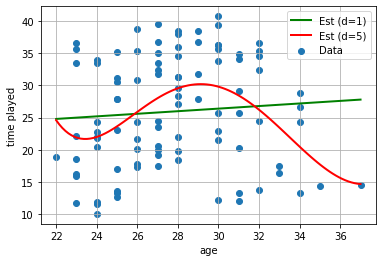

In [5]:
import numpy.polynomial.polynomial as poly
# TODO 
# d1 = 1
# d2 = 5
# beta1 = 
# beta2 =
# xp = # grid of feature values
# yp_hat1 = # target prediction on grid using polynomial order d1
# yp_hat2 = # target prediction on grid using polynomial order d2
# Make a scatterplot and superimpose prediction curves for d1 and d2
# Add grid lines, axis labels, and a legend

d1 = 1
d2 = 5
beta1 = poly.polyfit(x,y,d1)
beta2 = poly.polyfit(x,y,d2)

# Plot estimated function
xp = np.linspace(min(x),max(x),100)
yp_hat1 = poly.polyval(xp,beta1)
yp_hat2 = poly.polyval(xp,beta2)
plt.plot(xp,yp_hat1,'g-',linewidth=2,label='Est (d='+str(d1)+')')
plt.plot(xp,yp_hat2,'r-',linewidth=2,label='Est (d='+str(d2)+')')

# Plot data
plt.scatter(x,y,label='Data')
plt.legend(loc='best')
plt.grid()
plt.xlabel('age')
plt.ylabel('time played');

How do these two model orders perform?  Are the results as expected? Can we do better?

## K-fold Cross-Validation

We now optimize the polynomial model order using 10-fold cross-validation.  You can follow the method used in the polynomial demo.  The first step is to create a matrix of test MSE values over all hypothesized model orders and all splits.  Consider model orders between 0 and 7.

In [6]:
from sklearn import model_selection

# TODO
# Create a k-fold object
# k = 10
# kfo = ...
# Test model orders d between 0 and 7
# dtest = 
# nd = len(dtest)
# MSEts = np.zeros((nd,k))
# Loop over the folds
    # Get the training data in the split
    # Loop over the model order
        # Fit data on training data
        # Measure MSE on test data
        # MSEts[it,itsplit] = 

# Create a k-fold object
k = 10                                              
kfo = model_selection.KFold(n_splits=k,shuffle=True)

# Model orders to be tested
dtest = np.arange(0,8)
nd = len(dtest)
MSEts = np.zeros((nd,k))

# Loop over the folds
for isplit, idx in enumerate(kfo.split(x)):
    
    # Get the training data in the split
    itr, its = idx
    xtr = x[itr]
    ytr = y[itr]
    xts = x[its]
    yts = y[its]
    
    # Loop over the model order
    for it, d in enumerate(dtest):
        
        # Fit data on training data
        beta_hat = poly.polyfit(xtr,ytr,d)
        
        # Measure MSE on test data
        yhat = poly.polyval(xts,beta_hat)
        MSEts[it,isplit] = np.mean((yhat-yts)**2)


Next, compute the mean and standard error of the MSE over the folds for each model order.  The standard error is defined as the standard deviation divided by $\sqrt{K}$, where $K$ is the number of folds.  Use `ddof=1` in `np.std` to get the unbiased version.

With these MSE statistics, use the one-standard-error rule to find the best model order.  Print out the model order that minimizes mean test MSE, as well as the model order estimated by the one-standard-error rule, using the format

    The model order that minimizes mean test MSE is xx
    The model order estimated by the one-standard-error rule is xx

In [7]:
# TODO
# compute mean and standard error of MSE
MSE_mean = np.mean(MSEts,axis=1)
MSE_se = np.std(MSEts,axis=1,ddof=1)/np.sqrt(k)

# find model order that minimizes test MSE
imin = np.argmin(MSE_mean)
print("The model order that minimizes mean test MSE is {0:d}".format(dtest[imin]))

# estimate model order according to the one-standard-error rule
MSE_tgt = MSE_mean[imin]+MSE_se[imin]
I = np.where(MSE_mean<= MSE_tgt)[0]
iose = I[0]
dose = dtest[iose]
print("The model order estimated by the one-standard-error rule is {0:d}".format(dose))

The model order that minimizes mean test MSE is 2
The model order estimated by the one-standard-error rule is 2


Next, illustrate the one-standard-error-rule procedure by making a plot that shows the following:
* the mean test MSE curve with errorbars
* a dashed line showing the model order yielding minimum mean test MSE
* a dashed line showing the target MSE
* a dashed line showing the model order estimated by the one-standard-error rule

Also, add a grid and axis labels to your plot.  Use `plt.ylim` if needed to zoom into the relevant range.

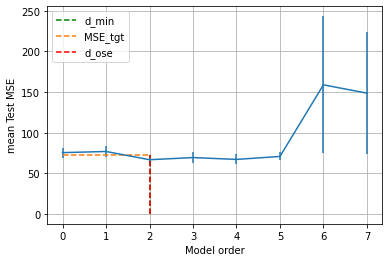

In [8]:
#TODO
# plot mean test MSE curve with errorbars
plt.errorbar(dtest,MSE_mean,yerr=MSE_se,fmt='-')

# plot dashed line showing the model order yielding minimum mean test MSE
plt.plot([dtest[imin],dtest[imin]],[0,MSE_tgt],'g--',label='d_min')

# plot dashed line showing the target MSE
plt.plot([dtest[0],dtest[imin]],[MSE_tgt,MSE_tgt],'--',label='MSE_tgt')

# plot dashed line showing the model order estimated by the one-standard-error rule
plt.plot([dose,dose],[0,MSE_tgt],'r--',label='d_ose')
plt.xlabel('Model order')
plt.ylabel('mean Test MSE')
plt.grid()
plt.legend(loc='upper left');

Finally, make a scatter plot of the data and superimpose
* the polynomial prediction curve with the order that minimizes mean MSE
* the polynomial prediction curve with the order selected by the one-standard-error rule

As usual, add grid lines, axis labels, and a legend to your plot.

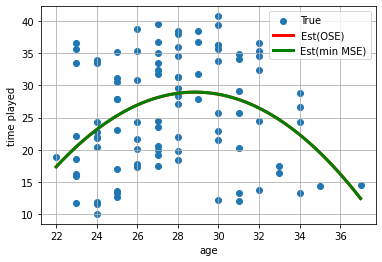

In [9]:
#TODO
# fit the model
beta_hat_ose = poly.polyfit(x,y,dose)
beta_hat_minMSE= poly.polyfit(x,y,dtest[imin])

# compute the polynomial prediction curve 
yp_ose = poly.polyval(xp,beta_hat_ose)
yp_minMSE = poly.polyval(xp,beta_hat_minMSE)

# make scatterplot and superimpose curves
plt.scatter(x,y,label='True')
plt.plot(xp,yp_ose,'r-',linewidth=3,label='Est(OSE)')
plt.plot(xp,yp_minMSE,'g-',linewidth=3,label='Est(min MSE)')

# add legend, axis labels, grid
plt.legend(loc="upper right")
plt.xlabel('age')
plt.ylabel('time played')
plt.grid()

Note that because the shuffling done by the K-fold object is random, the results may vary a bit every time you run the code.  If that is distracting, you can fix the `random_seed` of the K-fold object.